<h2>Metric #2: Availability of Affordable Housing</h2>

 

In [2]:
import pandas as pd
import geopandas
import fpsnippets
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
file_path = 'datafile.csv'
housingData = pd.read_csv(file_path,dtype={"_id":int,"name":"string","asset_type":"string","tags":"string","municipality":"string","street_adress":"string","iffy_geocoding":"string","available_transportation":"string","url":"string","email":"string","periodicity":"string","computers_available":"string","accessibility":"string","internet_access":"string","organization_name":"string","organization_email":"string","latitude":float,"longitude":float})
                                           



In [4]:
housingData = housingData[housingData["asset_type"]=="affordable_housing"]
neighborhoods = []
for index, row in housingData.iterrows():
    neighborhood = fpsnippets.geo_to_neighborhood(row['latitude'], row['longitude'])
    neighborhoods.append(neighborhood)
housingData['neighborhood'] = neighborhoods

numHousing = housingData["neighborhood"].value_counts().reset_index()
numHousing.columns = ["neighborhood", "count"]

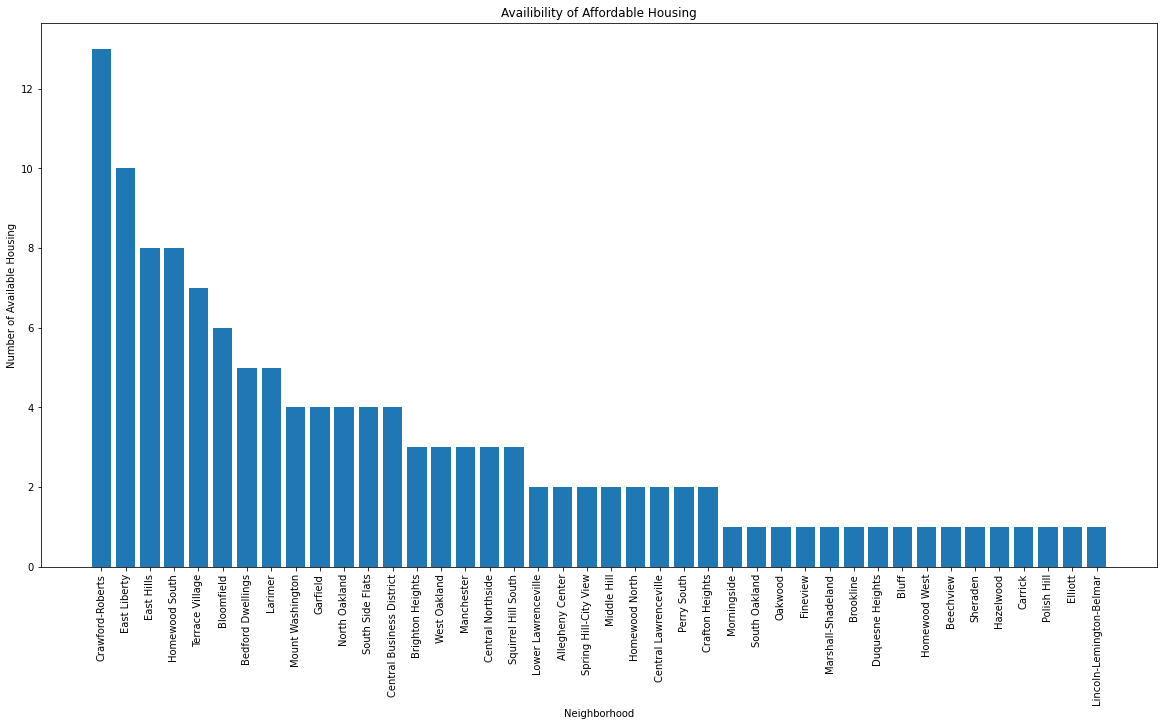

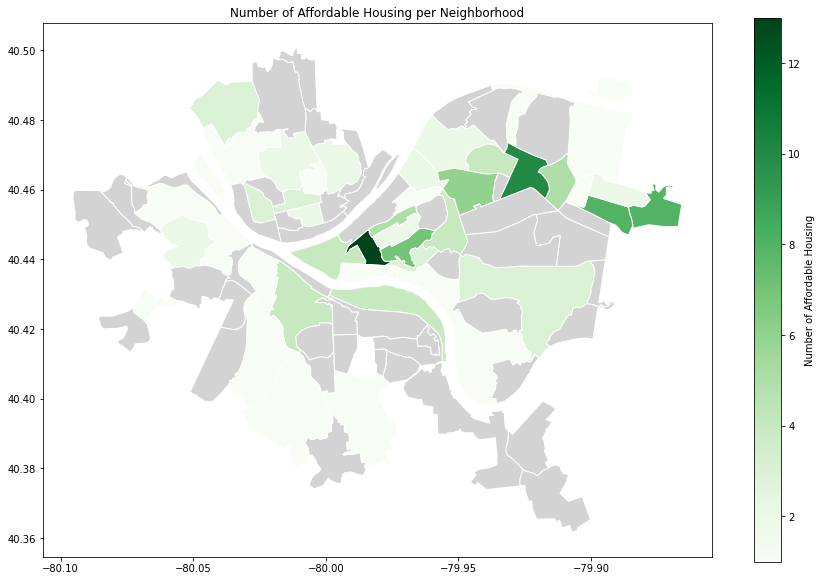

In [5]:
plt.figure(figsize = (20,10))
plt.bar(numHousing["neighborhood"], numHousing["count"])
plt.xticks(rotation = 90)
plt.title("Availibility of Affordable Housing")
plt.ylabel("Number of Available Housing")
plt.xlabel("Neighborhood")
plt.show
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 
housingMap = neighborhoods.merge(numHousing, how="left", left_on="hood", right_on="neighborhood")
housingMap.plot(column='count',
               cmap='Greens',              
               edgecolor="white",      
               legend=True,              
               legend_kwds={'label': "Number of Affordable Housing"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"} 
               )
plt.title("Number of Affordable Housing per Neighborhood")
plt.show()

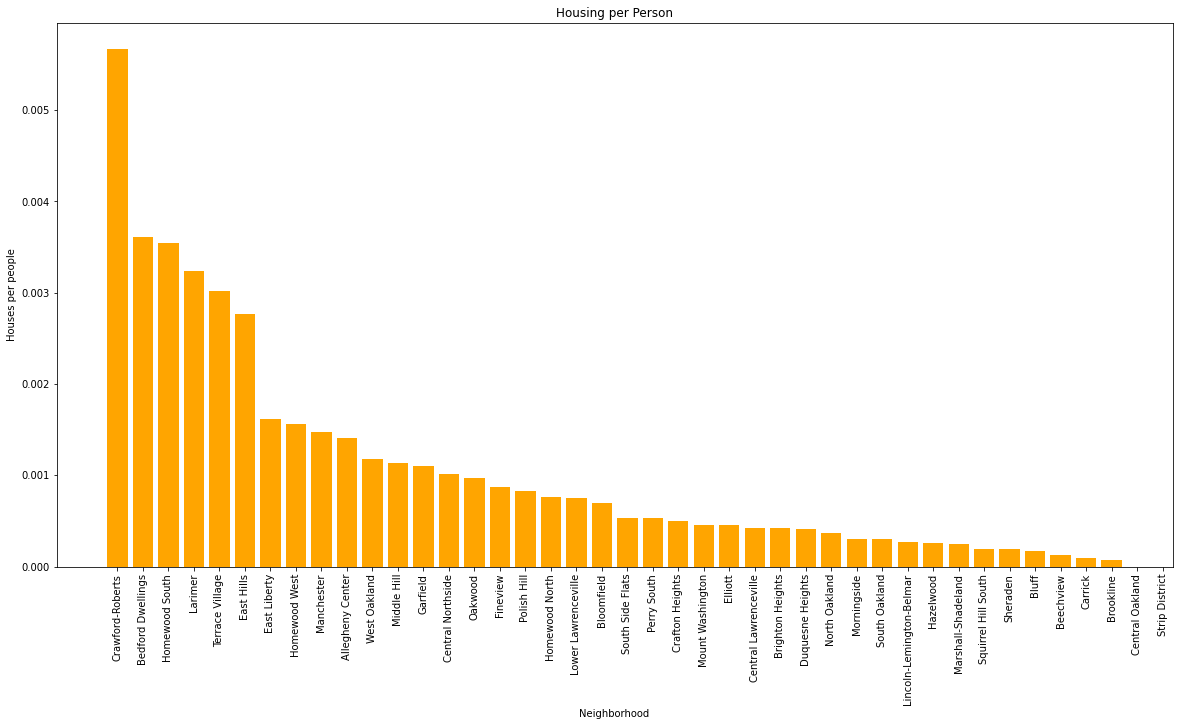

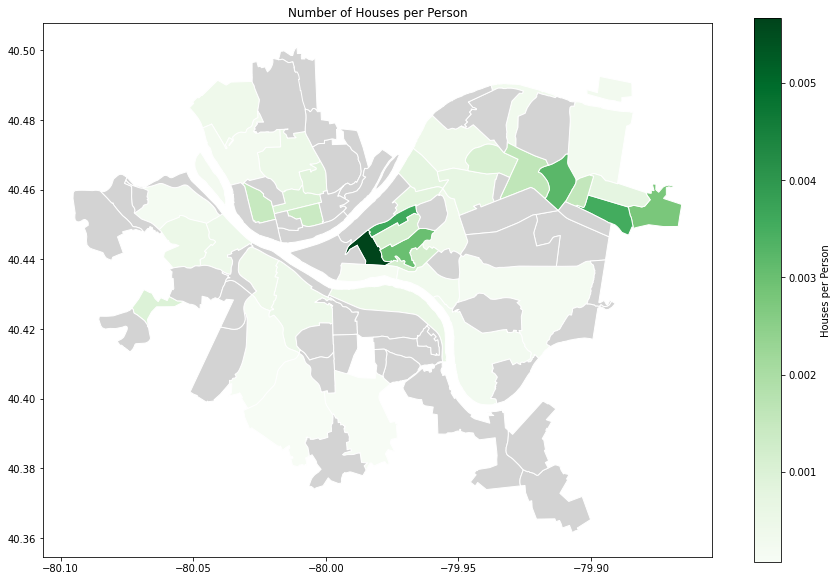

In [10]:
populations = pd.read_csv("populations.csv")

mergedData = housingMap.merge(populations, how="left", left_on="hood", right_on="Neighborhood")

# Calculate people per parks density
mergedData["housesPerPerson"] = mergedData["count"] / mergedData["2020_Total_Population"]
mergeddSorted = mergedData.sort_values(by="housesPerPerson", ascending=False)
plt.figure(figsize = (20,10))
plt.bar(mergeddSorted["hood"],mergeddSorted["housesPerPerson"], color='orange')
plt.title("Housing per Person")
plt.xlabel("Neighborhood")
plt.ylabel("Houses per people")
plt.xticks(rotation=90)
plt.show()

mergedData.plot(column='housesPerPerson', 
               cmap='Greens',              
               edgecolor="white",        
               legend=True,            
               legend_kwds={'label': "Houses per Person"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"}
               )

plt.title("Number of Houses per Person")
plt.show()

Crawford-Roberts is the best neighborhood according to this metric, with east liberty being in second

<h3>Best for Housing: Crawford-Roberts</h3>